In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
HY_data = pd.read_csv('Total Home Yellow Cards/HY_clean.csv')
HY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,TGG,HTHG,HTAG,THGG,HS,AS,HST,AST,HF,AF,HC,AC,AY,HR,AR,AvgCH,AvgCD,AvgCA,AvgC>2.5,AvgC<2.5,HY
0,0.0,1.0,129,14,0.0,0.0,0,4,4,0,1,1,6,25,1,10,16,11,0,6,1,0,0,8.69,6.05,1.31,1.34,3.29,2
1,0.0,2.0,11,76,1.0,1.0,4,4,8,3,3,6,20,9,8,6,9,14,8,7,2,0,0,2.79,3.67,2.42,1.62,2.31,1
2,0.0,2.0,57,47,0.0,0.0,1,2,3,0,2,2,24,17,5,8,9,9,4,2,1,0,0,2.20,3.68,3.15,1.65,2.26,0
3,0.0,2.0,70,98,2.0,2.0,3,2,5,2,1,3,11,13,7,6,13,10,4,5,2,0,0,2.44,3.60,2.81,1.68,2.19,1
4,0.0,2.0,115,18,2.0,2.0,5,0,5,2,0,2,19,4,9,1,5,12,7,0,1,0,0,1.76,4.02,4.32,1.64,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,1.0,1,3,4,1,1,2,7,20,5,11,6,14,3,10,1,0,0,7.08,4.93,1.42,1.55,2.45,1
8951,4.0,1.0,19,116,1.0,2.0,1,1,2,1,0,1,13,13,5,11,15,17,7,3,3,0,0,1.82,4.17,3.85,1.35,3.14,3
8952,4.0,1.0,50,126,2.0,2.0,3,0,3,3,0,3,4,13,4,3,8,13,4,9,0,2,1,1.67,4.26,4.62,1.50,2.55,4
8953,4.0,1.0,64,97,0.0,1.0,3,4,7,2,2,4,12,18,8,11,3,7,5,4,2,0,0,1.55,4.86,5.05,1.32,3.34,0


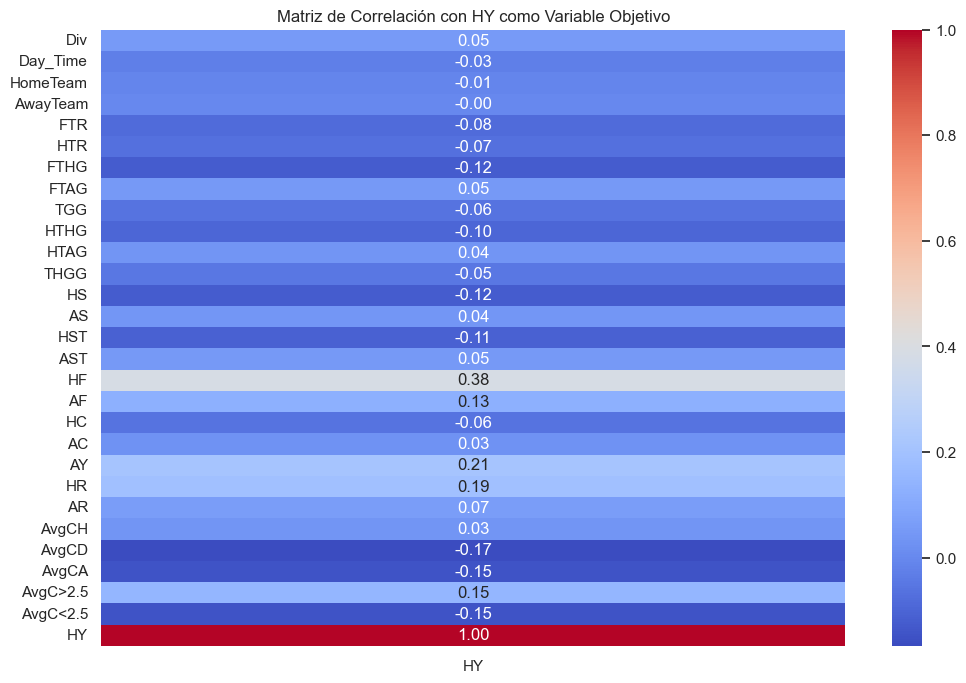

In [3]:
# Lista de variables objetivo
objective_variables = ['HY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = HY_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['HY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos y la variable objetivo actual
    final_data = HY_data.select_dtypes(include=['number'])
    final_data = final_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HY:
     Feature         VIF
0         HY         inf
1        Div    3.447676
2   Day_Time    6.436277
3   HomeTeam    4.183010
4   AwayTeam    4.176549
5        FTR   11.362134
6        HTR   16.971449
7       FTHG         inf
8       FTAG         inf
9        TGG         inf
10      HTHG         inf
11      HTAG         inf
12      THGG         inf
13        HS   18.190380
14        AS   15.691937
15       HST   11.192157
16       AST    9.921666
17        HF   13.142751
18        AF   13.030877
19        HC    6.385467
20        AC    5.615222
21        AY    4.245143
22        HR    1.195222
23        AR    1.196719
24     AvgCH   62.680787
25     AvgCD  917.203954
26     AvgCA  146.805333
27  AvgC>2.5   28.586224
28  AvgC<2.5  225.524555
29        HY         inf


In [5]:
HY_data.columns

Index(['Div', 'Day_Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'FTHG', 'FTAG',
       'TGG', 'HTHG', 'HTAG', 'THGG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'AY', 'HR', 'AR', 'AvgCH', 'AvgCD', 'AvgCA', 'AvgC>2.5',
       'AvgC<2.5', 'HY'],
      dtype='object')

In [6]:
# Eliminar las columnas especificadas
columns_to_drop = ['HTR', 'FTHG', 'HTHG', 'HTR', 'TGG', 'THGG', 'HS', 'HST', 'HC', 'AvgCD', 'AvgC>2.5', 'AvgC<2.5']
HY_data = HY_data.drop(columns=columns_to_drop, errors='ignore')
HY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,FTAG,HTAG,AS,AST,HF,AF,AC,AY,HR,AR,AvgCH,AvgCA,HY
0,0.0,1.0,129,14,0.0,4,1,25,10,16,11,6,1,0,0,8.69,1.31,2
1,0.0,2.0,11,76,1.0,4,3,9,6,9,14,7,2,0,0,2.79,2.42,1
2,0.0,2.0,57,47,0.0,2,2,17,8,9,9,2,1,0,0,2.20,3.15,0
3,0.0,2.0,70,98,2.0,2,1,13,6,13,10,5,2,0,0,2.44,2.81,1
4,0.0,2.0,115,18,2.0,0,0,4,1,5,12,0,1,0,0,1.76,4.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,3,1,20,11,6,14,10,1,0,0,7.08,1.42,1
8951,4.0,1.0,19,116,1.0,1,0,13,11,15,17,3,3,0,0,1.82,3.85,3
8952,4.0,1.0,50,126,2.0,0,0,13,3,8,13,9,0,2,1,1.67,4.62,4
8953,4.0,1.0,64,97,0.0,4,2,18,11,3,7,4,2,0,0,1.55,5.05,0


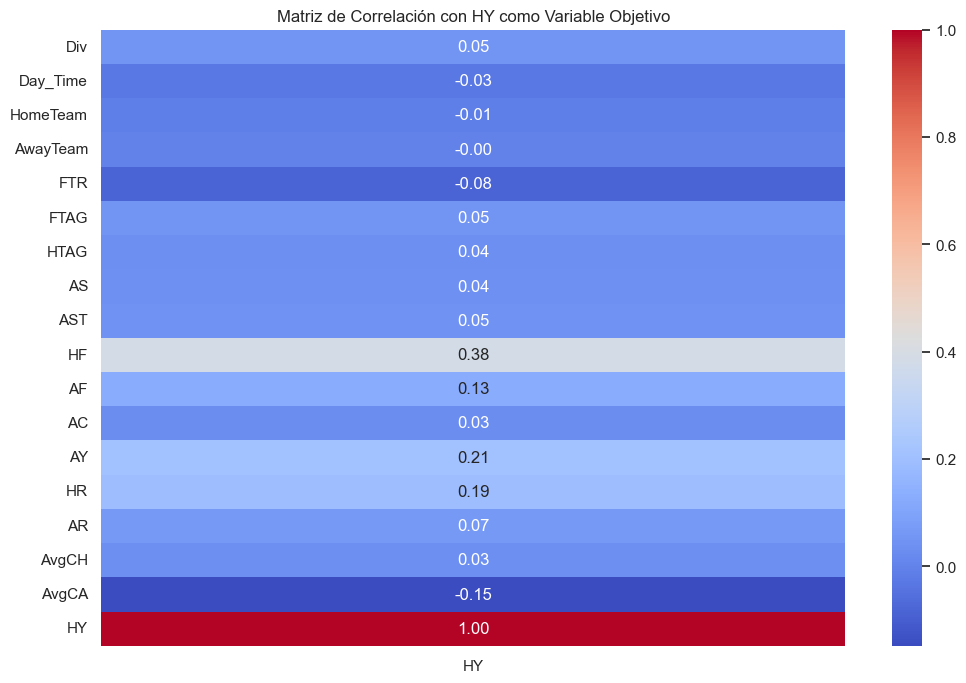

In [7]:
# Lista de variables objetivo
objective_variables = ['HY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = HY_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [8]:
# Lista de variables objetivo
objective_variables = ['HY']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos y la variable objetivo actual
    final_data = HY_data.select_dtypes(include=['number'])
    final_data = final_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HY:
     Feature        VIF
0         HY        inf
1        Div   3.275603
2   Day_Time   5.766378
3   HomeTeam   4.045232
4   AwayTeam   3.972831
5        FTR   4.535315
6       FTAG   6.804182
7       HTAG   3.057886
8         AS  14.794455
9        AST   9.780917
10        HF  11.059808
11        AF  10.923193
12        AC   5.423627
13        AY   4.217037
14        HR   1.180403
15        AR   1.178865
16     AvgCH   4.591075
17     AvgCA   3.104130
18        HY        inf


In [9]:
HY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,FTAG,HTAG,AS,AST,HF,AF,AC,AY,HR,AR,AvgCH,AvgCA,HY
0,0.0,1.0,129,14,0.0,4,1,25,10,16,11,6,1,0,0,8.69,1.31,2
1,0.0,2.0,11,76,1.0,4,3,9,6,9,14,7,2,0,0,2.79,2.42,1
2,0.0,2.0,57,47,0.0,2,2,17,8,9,9,2,1,0,0,2.20,3.15,0
3,0.0,2.0,70,98,2.0,2,1,13,6,13,10,5,2,0,0,2.44,2.81,1
4,0.0,2.0,115,18,2.0,0,0,4,1,5,12,0,1,0,0,1.76,4.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,3,1,20,11,6,14,10,1,0,0,7.08,1.42,1
8951,4.0,1.0,19,116,1.0,1,0,13,11,15,17,3,3,0,0,1.82,3.85,3
8952,4.0,1.0,50,126,2.0,0,0,13,3,8,13,9,0,2,1,1.67,4.62,4
8953,4.0,1.0,64,97,0.0,4,2,18,11,3,7,4,2,0,0,1.55,5.05,0


In [10]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = HY_data.drop(columns=['HY'])  # Características excluyendo la variable objetivo
y = HY_data['HY']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 1.5149925181462869
R^2 Score: 0.17326895506818019


In [13]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

# Inicializar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de divisiones para la validación cruzada
                           scoring='r2',  # Métrica de evaluación
                           verbose=1,
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Entrenar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el modelo ajustado
y_pred_grid = best_rf_model.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R^2 Score después de ajuste de hiperparámetros: {r2_grid}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 300}
R^2 Score después de ajuste de hiperparámetros: 0.18927100109847916


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=15)

# Entrenar el modelo con los datos limpios TGG_data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=300)

In [15]:
importances = rf.feature_importances_

In [16]:
feature_names = list(X_train.columns)  # Obtener nombres de características si X_train es un DataFrame

# Crear un DataFrame de importancias de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

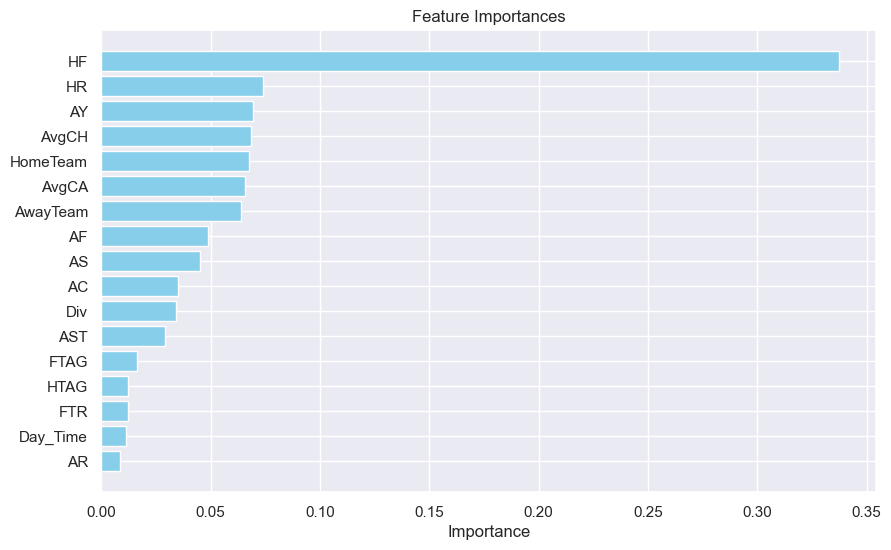

In [17]:
# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [18]:
# Definir la variable objetivo específica
target_variable = 'HY'

# Seleccionar variables numéricas excluyendo la variable objetivo
X = HY_data.drop(columns=[target_variable])
y = HY_data[target_variable]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar importancia de las variables para 'TGG' en el modelo de Random Forest
print(f"\nImportancia de las variables para '{target_variable}' en el modelo de Random Forest:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")


Importancia de las variables para 'HY' en el modelo de Random Forest:
1. HF: 0.17603094366074767
2. AwayTeam: 0.09399712020086545
3. HomeTeam: 0.0936410741510111
4. AvgCA: 0.08555361687693946
5. AvgCH: 0.08357365648012559
6. AF: 0.07027643186170873
7. AS: 0.06792369413888663
8. AC: 0.056894180505198746
9. AY: 0.05224632790989136
10. AST: 0.04888883469873741
11. Div: 0.03814247938719835
12. HR: 0.03588034269201974
13. FTAG: 0.02703582497378479
14. HTAG: 0.020300577594476676
15. FTR: 0.01957432420303722
16. Day_Time: 0.01928123193686355
17. AR: 0.01075933872850747


In [29]:
HY_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,FTAG,HTAG,AS,AST,HF,AF,AC,AY,HR,AR,AvgCH,AvgCA,HY
0,0.0,1.0,129,14,0.0,4,1,25,10,16,11,6,1,0,0,8.69,1.31,2
1,0.0,2.0,11,76,1.0,4,3,9,6,9,14,7,2,0,0,2.79,2.42,1
2,0.0,2.0,57,47,0.0,2,2,17,8,9,9,2,1,0,0,2.20,3.15,0
3,0.0,2.0,70,98,2.0,2,1,13,6,13,10,5,2,0,0,2.44,2.81,1
4,0.0,2.0,115,18,2.0,0,0,4,1,5,12,0,1,0,0,1.76,4.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,3,1,20,11,6,14,10,1,0,0,7.08,1.42,1
8951,4.0,1.0,19,116,1.0,1,0,13,11,15,17,3,3,0,0,1.82,3.85,3
8952,4.0,1.0,50,126,2.0,0,0,13,3,8,13,9,0,2,1,1.67,4.62,4
8953,4.0,1.0,64,97,0.0,4,2,18,11,3,7,4,2,0,0,1.55,5.05,0


In [35]:
# Ajusta new_data para que coincida con las columnas de entrenamiento
new_data = pd.DataFrame({
    'Div': [4.0],  
    'Day_Time': [2.0],
    'HomeTeam': [59],  
    'AwayTeam': [83],
    'FTR': [2.0],
    'FTAG': [0],
    'HTAG': [0],
    'AS':[15],
    'AST': [1],
    'HF': [13],
    'AF': [7],
    'AC': [4],
    'AY': [5],
    'HR': [0],
    'AR': [0],
    'AvgCH': [2.25],
    'AvgCA': [2.70],  
})

# Hacer la predicción utilizando el modelo entrenado
predicted_HY = rf_model.predict(new_data)
print(f"Predicción de HY para el nuevo partido: {predicted_HY}")

Predicción de HY para el nuevo partido: [2.76]
